In [1]:
!pip install konlpy
!pip install koreanize-matplotlib
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 14.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 18.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import re

import konlpy

import plotly.express as px
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/KDT /찐찐최종본_졸업생의 취업 현황 (대학)_.csv')
df

,기준연도,학교종류,설립구분,지역,상태,학교명,단과대학,학과(전공),구분,학과특성,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53
0,2021.0,대학교,사립,경남,기존,가야대학교(김해),단과대구분없음,간호학과,주간,일반과정,...,95.8,88.3,70.0,89.8,85.2,60.0,87.3,82.0,60.0,83.9
1,2021.0,대학교,사립,경남,기존,가야대학교(김해),단과대구분없음,경찰행정학과,주간,일반과정,...,100.0,55.6,60.0,50.0,33.3,60.0,0.0,33.3,60.0,0.0
2,2021.0,대학교,사립,경남,기존,가야대학교(김해),단과대구분없음,귀금속주얼리학과,주간,일반과정,...,87.5,60.0,50.0,62.5,50.0,50.0,50.0,40.0,50.0,37.5
3,2021.0,대학교,사립,경남,기존,가야대학교(김해),단과대구분없음,물리치료학과,주간,일반과정,...,100.0,97.0,93.3,100.0,84.8,80.0,88.9,81.8,80.0,83.3
4,2021.0,대학교,사립,경남,기존,가야대학교(김해),단과대구분없음,방사선학과,주간,일반과정,...,100.0,79.3,73.3,85.7,69.0,66.7,71.4,62.1,60.0,64.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9779,2021.0,대학교,사립,경기,기존,화성의과학대학교,단과대구분없음,뷰티디자인학과,주간,일반과정,...,50.0,33.3,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9780,2021.0,대학교,사립,경기,기존,화성의과학대학교,단과대구분없음,사회복지학과,주간,일반과정,...,0.0,88.9,88.9,0.0,77.8,77.8,0.0,77.8,77.8,0.0
9781,2021.0,대학교,사립,경기,기존,화성의과학대학교,단과대구분없음,생명공학과,주간,일반과정,...,0.0,100.0,100.0,0.0,100.0,100.0,0.0,100.0,100.0,0.0
9782,2021.0,대학교,사립,경기,기존,화성의과학대학교,단과대구분없음,스포츠과학과,주간,일반과정,...,100.0,75.0,66.7,100.0,75.0,66.7,100.0,75.0,66.7,100.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9784 entries, 0 to 9783
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   기준연도                          9783 non-null   float64
 1   학교종류                          9783 non-null   object 
 2   설립구분                          9783 non-null   object 
 3   지역                            9783 non-null   object 
 4   상태                            9783 non-null   object 
 5   학교명                           9783 non-null   object 
 6   단과대학                          9783 non-null   object 
 7   학과(전공)                        9783 non-null   object 
 8   구분                            9783 non-null   object 
 9   학과특성                          9783 non-null   object 
 10  M졸업자                          9783 non-null   float64
 11  W졸업자                          9783 non-null   float64
 12  취업자(B)                        9783 non-null   float64
 13  Unn

In [ ]:
df['총졸업자'] = df['M졸업자'] + df['W졸업자']
df

,기준연도,학교종류,설립구분,지역,상태,학교명,단과대학,학과(전공),구분,학과특성,...,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,총졸업자
0,2021.0,대학교,사립,경남,기존,가야대학교(김해),단과대구분없음,간호학과,주간,일반과정,...,88.3,70.0,89.8,85.2,60.0,87.3,82.0,60.0,83.9,159.0
1,2021.0,대학교,사립,경남,기존,가야대학교(김해),단과대구분없음,경찰행정학과,주간,일반과정,...,55.6,60.0,50.0,33.3,60.0,0.0,33.3,60.0,0.0,19.0
2,2021.0,대학교,사립,경남,기존,가야대학교(김해),단과대구분없음,귀금속주얼리학과,주간,일반과정,...,60.0,50.0,62.5,50.0,50.0,50.0,40.0,50.0,37.5,15.0
3,2021.0,대학교,사립,경남,기존,가야대학교(김해),단과대구분없음,물리치료학과,주간,일반과정,...,97.0,93.3,100.0,84.8,80.0,88.9,81.8,80.0,83.3,45.0
4,2021.0,대학교,사립,경남,기존,가야대학교(김해),단과대구분없음,방사선학과,주간,일반과정,...,79.3,73.3,85.7,69.0,66.7,71.4,62.1,60.0,64.3,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9779,2021.0,대학교,사립,경기,기존,화성의과학대학교,단과대구분없음,뷰티디자인학과,주간,일반과정,...,33.3,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
9780,2021.0,대학교,사립,경기,기존,화성의과학대학교,단과대구분없음,사회복지학과,주간,일반과정,...,88.9,88.9,0.0,77.8,77.8,0.0,77.8,77.8,0.0,23.0
9781,2021.0,대학교,사립,경기,기존,화성의과학대학교,단과대구분없음,생명공학과,주간,일반과정,...,100.0,100.0,0.0,100.0,100.0,0.0,100.0,100.0,0.0,9.0
9782,2021.0,대학교,사립,경기,기존,화성의과학대학교,단과대구분없음,스포츠과학과,주간,일반과정,...,75.0,66.7,100.0,75.0,66.7,100.0,75.0,66.7,100.0,5.0


In [ ]:
# 학과(전광)과 취업률 데이터 추출
# col = [x for x in df.columns if '취업률(%)\n[B/{A-(C+D+E+F+G)x100'  '총졸업자' in x]
# col.insert(0, '학교명')
# col

In [ ]:
# 데이터 확인
college_df = df.loc[:, ['학교명','총졸업자','취업률(%)\n[B/{A-(C+D+E+F+G)x100']]
college_df

,학교명,총졸업자,취업률(%)\n[B/{A-(C+D+E+F+G)x100
0,가야대학교(김해),159.0,82.2
1,가야대학교(김해),19.0,52.6
2,가야대학교(김해),15.0,83.3
3,가야대학교(김해),45.0,83.7
4,가야대학교(김해),36.0,82.9
...,...,...,...
9779,화성의과학대학교,6.0,83.3
9780,화성의과학대학교,23.0,52.2
9781,화성의과학대학교,9.0,28.6
9782,화성의과학대학교,5.0,80.0


In [ ]:
# 데이터 타입 확인
college_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9784 entries, 0 to 9783
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   학교명                           9783 non-null   object 
 1   총졸업자                          9783 non-null   float64
 2   취업률(%)
[B/{A-(C+D+E+F+G)x100  9783 non-null   float64
dtypes: float64(2), object(1)
memory usage: 229.4+ KB


In [ ]:
# NaN 표시 삭제
college_df = college_df.iloc[:-1]
college_df

,학교명,총졸업자,취업률(%)\n[B/{A-(C+D+E+F+G)x100
0,가야대학교(김해),159.0,82.2
1,가야대학교(김해),19.0,52.6
2,가야대학교(김해),15.0,83.3
3,가야대학교(김해),45.0,83.7
4,가야대학교(김해),36.0,82.9
...,...,...,...
9778,화성의과학대학교,16.0,56.3
9779,화성의과학대학교,6.0,83.3
9780,화성의과학대학교,23.0,52.2
9781,화성의과학대학교,9.0,28.6


In [ ]:
college_df['학교명'] = college_df['학교명'].str.split('(').str.get(0).str.strip()
college_df['학교명']

<ipython-input-11-2392fff6b617>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  college_df['학교명'] = college_df['학교명'].str.split('(').str.get(0).str.strip()


0          가야대학교
1          가야대학교
2          가야대학교
3          가야대학교
4          가야대학교
          ...   
9778    화성의과학대학교
9779    화성의과학대학교
9780    화성의과학대학교
9781    화성의과학대학교
9782    화성의과학대학교
Name: 학교명, Length: 9783, dtype: object

In [ ]:
college_df

,학교명,총졸업자,취업률(%)\n[B/{A-(C+D+E+F+G)x100
0,가야대학교,159.0,82.2
1,가야대학교,19.0,52.6
2,가야대학교,15.0,83.3
3,가야대학교,45.0,83.7
4,가야대학교,36.0,82.9
...,...,...,...
9778,화성의과학대학교,16.0,56.3
9779,화성의과학대학교,6.0,83.3
9780,화성의과학대학교,23.0,52.2
9781,화성의과학대학교,9.0,28.6


In [ ]:
#college_df['취업률'] = college_df.groupby('취업률(%)\n[B/{A-(C+D+E+F+G)x100').mean()
college_df_employee = df.groupby(['학교명'],as_index=False).agg(취업률 = ('취업률(%)\n[B/{A-(C+D+E+F+G)x100','mean')).sort_values('취업률',ascending=False)
college_df_employee

,학교명,취업률
5,가톨릭대학교 _제2캠퍼스,90.100000
151,을지대학교,86.933333
84,목포해양대학교,83.946154
17,건양대학교 _제2캠퍼스,80.377273
195,한국기술교육대학교,79.100000
...,...,...
128,아신대학교,0.000000
171,중앙승가대학교,0.000000
155,인천가톨릭대학교,0.000000
6,가톨릭대학교 _제3캠퍼스,0.000000


In [ ]:
college_df_graduate = df.groupby(['학교명'],as_index=False).agg(총졸업자 = ('총졸업자','sum')).sort_values('총졸업자',ascending=False)
college_df_graduate

,학교명,총졸업자
32,경희대학교,6093.0
25,경북대학교,5230.0
169,중앙대학교,5184.0
135,영남대학교,4889.0
34,고려대학교,4828.0
...,...,...
66,대전신학대학교,26.0
41,광주가톨릭대학교,19.0
64,대전가톨릭대학교,12.0
155,인천가톨릭대학교,8.0


In [ ]:
college_df = pd.merge(college_df_graduate, college_df_employee,  how = 'inner', on = None).sort_values('취업률',ascending=False)
college_df

,학교명,총졸업자,취업률
189,가톨릭대학교 _제2캠퍼스,174.0,90.100000
191,을지대학교,163.0,86.933333
162,목포해양대학교,502.0,83.946154
129,건양대학교 _제2캠퍼스,868.0,80.377273
130,한국기술교육대학교,863.0,79.100000
...,...,...,...
220,대전신학대학교,26.0,0.000000
221,광주가톨릭대학교,19.0,0.000000
222,대전가톨릭대학교,12.0,0.000000
223,인천가톨릭대학교,8.0,0.000000


In [ ]:
college_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 189 to 224
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학교명     225 non-null    object 
 1   총졸업자    225 non-null    float64
 2   취업률     225 non-null    float64
dtypes: float64(2), object(1)
memory usage: 7.0+ KB


In [ ]:
college_df = college_df.astype({'총졸업자' : 'int'})
college_df

,학교명,총졸업자,취업률
189,가톨릭대학교 _제2캠퍼스,174,90.100000
191,을지대학교,163,86.933333
162,목포해양대학교,502,83.946154
129,건양대학교 _제2캠퍼스,868,80.377273
130,한국기술교육대학교,863,79.100000
...,...,...,...
220,대전신학대학교,26,0.000000
221,광주가톨릭대학교,19,0.000000
222,대전가톨릭대학교,12,0.000000
223,인천가톨릭대학교,8,0.000000


In [ ]:
# 취업률이 0인 대학교 찾기
college_df.tail(15)


,학교명,총졸업자,취업률
201,호남신학대학교,123,30.550000
214,부산장신대학교,56,30.466667
210,영남신학대학교,95,28.400000
218,순복음총회신학교,36,26.200000
188,감리교신학대학교,185,0.000000
190,장로회신학대학교,173,0.000000
192,아신대학교,152,0.000000
216,가톨릭대학교 _제3캠퍼스,44,0.000000
217,중앙승가대학교,39,0.000000
219,수원가톨릭대학교,27,0.000000


In [ ]:
college_df = college_df.iloc[:-12]
college_df.tail()

,학교명,총졸업자,취업률
198,서울장신대학교,133,36.966667
208,대신대학교,101,34.120000
201,호남신학대학교,123,30.550000
214,부산장신대학교,56,30.466667
210,영남신학대학교,95,28.400000


# 데이터 시각화

In [ ]:
# 전국 대학의 취업률 그래프
fig = px.bar(college_df.head(10), x = '학교명', y = '취업률')
fig.show()

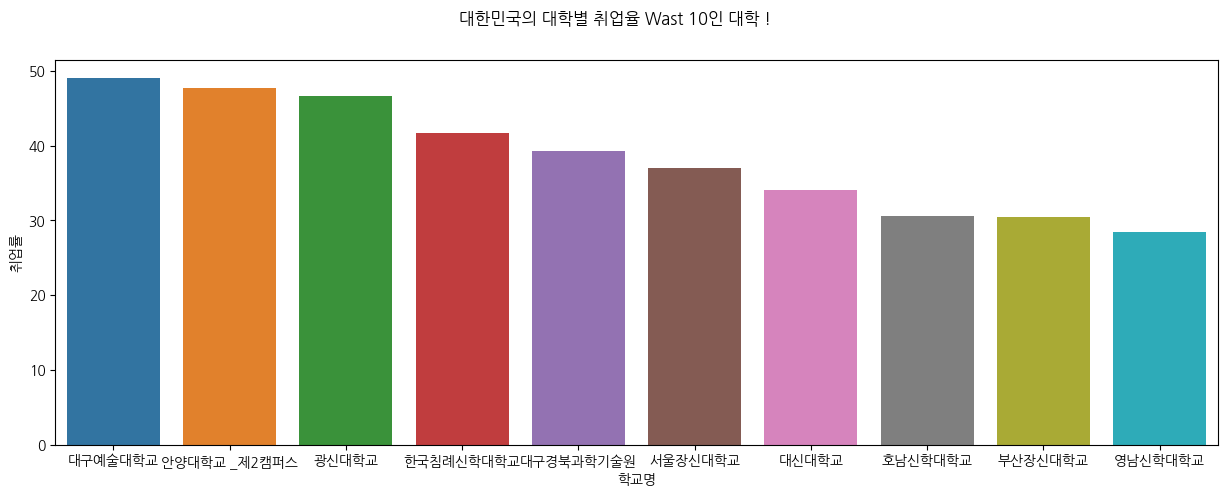

In [ ]:
# 취업률이 0%제외 Wast 10 
fig, axes = plt. subplots(figsize = (15,5))
plt.suptitle('대한민국의 대학별 취업율 Wast 10인 대학 ! ')

sns.barplot(data = college_df.tail(10), x = '학교명', y = '취업률')
plt.show()



In [ ]:
# fig = px.bar(college_df.head(10), x = '학교명', y = college_df.columns,
#              barmode = 'group', #연도별로 보기위한 방법
#              text_auto = True, # 각 레이블당 값이 출력
#              title = '대학별 취업 Best 10과 Wast 10 차이 비교')

# fig.show()